# Datset Description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math

td=pd.read_csv("train.csv")

In [2]:
td.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(35.4)
td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(26.3)
td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(25)

td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(44)
td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(34.5)
td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(32.16)

td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("B96")
td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E101")
td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E121")

td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("C124")
td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("D")
td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("F")
# td["Embarked"]=td.Embarked.fillna("S")

In [5]:
td["Cabin"]

0         F
1       C85
2      E121
3      C123
4         F
       ... 
886       D
887     B42
888       F
889    C148
890       F
Name: Cabin, Length: 891, dtype: object

In [6]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [8]:
td["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
td["Cabin"].value_counts()

Cabin
F       366
E121    115
D        97
E101     77
C124     23
       ... 
E34       1
C7        1
C54       1
E36       1
C148      1
Name: count, Length: 149, dtype: int64

In [10]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
td["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
td.dropna(inplace=True)

In [13]:
td["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [14]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
td.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  889 non-null    bool 
 1   Survived     889 non-null    bool 
 2   Pclass       889 non-null    bool 
 3   Name         889 non-null    bool 
 4   Sex          889 non-null    bool 
 5   Age          889 non-null    bool 
 6   SibSp        889 non-null    bool 
 7   Parch        889 non-null    bool 
 8   Ticket       889 non-null    bool 
 9   Fare         889 non-null    bool 
 10  Cabin        889 non-null    bool 
 11  Embarked     889 non-null    bool 
dtypes: bool(12)
memory usage: 17.4 KB


In [16]:
print(td['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object


In [17]:
sex=pd.get_dummies(td['Sex'])

In [18]:
print(sex)

     female   male
0     False   True
1      True  False
2      True  False
3      True  False
4     False   True
..      ...    ...
886   False   True
887    True  False
888    True  False
889   False   True
890   False   True

[889 rows x 2 columns]


In [19]:
print(td['Cabin'])

0         F
1       C85
2      E121
3      C123
4         F
       ... 
886       D
887     B42
888       F
889    C148
890       F
Name: Cabin, Length: 889, dtype: object


In [20]:
ca=pd.get_dummies(td['Cabin'])

In [21]:
print(ca)

       A10    A14    A16    A19    A20    A23    A24    A26    A31    A32  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
886  False  False  False  False  False  False  False  False  False  False   
887  False  False  False  False  False  False  False  False  False  False   
888  False  False  False  False  False  False  False  False  False  False   
889  False  False  False  False  False  False  False  False  False  False   
890  False  False  False  False  False  False  False  False  False  False   

     ...      F  F E69  F G63  F G73     F2    F33    F38     F4     G6    

In [22]:
print(td['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object


In [23]:
emb=pd.get_dummies(td['Embarked'])

In [24]:
print(emb)

         C      Q      S
0    False  False   True
1     True  False  False
2    False  False   True
3    False  False   True
4    False  False   True
..     ...    ...    ...
886  False  False   True
887  False  False   True
888  False  False   True
889   True  False  False
890  False   True  False

[889 rows x 3 columns]


In [25]:
print(td['Pclass'])

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64


In [26]:
pcls=pd.get_dummies(td['Pclass'],prefix="Pclass")

In [27]:
print(pcls)

     Pclass_1  Pclass_2  Pclass_3
0       False     False      True
1        True     False     False
2       False     False      True
3        True     False     False
4       False     False      True
..        ...       ...       ...
886     False      True     False
887      True     False     False
888     False     False      True
889      True     False     False
890     False     False      True

[889 rows x 3 columns]


In [28]:
td.drop(["Pclass","Sex","Embarked","Cabin"],axis=1,inplace=True)

In [29]:
td=pd.concat([td,sex,emb,pcls,ca],axis=1)

In [30]:
print(td.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Columns: 164 entries, PassengerId to T
dtypes: bool(156), float64(2), int64(4), object(2)
memory usage: 197.9+ KB
None


In [31]:
td.drop(["Name","PassengerId","Ticket"],axis=1,inplace=True)

In [32]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Columns: 161 entries, Survived to T
dtypes: bool(156), float64(2), int64(3)
memory usage: 177.1 KB


In [33]:
td.head(5)

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,F,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,0,22.0,1,0,7.2500,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
1,1,38.0,1,0,71.2833,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,26.0,0,0,7.9250,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1,35.0,1,0,53.1000,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,35.0,0,0,8.0500,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [34]:
X=td.drop(["Survived"],axis=1)

In [35]:
print(X)

       Age  SibSp  Parch     Fare  female   male      C      Q      S  \
0    22.00      1      0   7.2500   False   True  False  False   True   
1    38.00      1      0  71.2833    True  False   True  False  False   
2    26.00      0      0   7.9250    True  False  False  False   True   
3    35.00      1      0  53.1000    True  False  False  False   True   
4    35.00      0      0   8.0500   False   True  False  False   True   
..     ...    ...    ...      ...     ...    ...    ...    ...    ...   
886  27.00      0      0  13.0000   False   True  False  False   True   
887  19.00      0      0  30.0000    True  False  False  False   True   
888  32.16      1      2  23.4500    True  False  False  False   True   
889  26.00      0      0  30.0000   False   True   True  False  False   
890  32.00      0      0   7.7500   False   True  False   True  False   

     Pclass_1  ...      F  F E69  F G63  F G73     F2    F33    F38     F4  \
0       False  ...   True  False  False  Fals

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Columns: 160 entries, Age to T
dtypes: bool(156), float64(2), int64(2)
memory usage: 170.2 KB


In [37]:
y=td["Survived"]

In [38]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 121 to 37
Columns: 160 entries, Age to T
dtypes: bool(156), float64(2), int64(2)
memory usage: 136.1 KB


In [42]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 711 entries, 121 to 37
Series name: Survived
Non-Null Count  Dtype
--------------  -----
711 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [43]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 178 entries, 387 to 234
Series name: Survived
Non-Null Count  Dtype
--------------  -----
178 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 387 to 234
Columns: 160 entries, Age to T
dtypes: bool(156), float64(2), int64(2)
memory usage: 34.1 KB


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lm=LogisticRegression(max_iter=10000)

In [47]:
print(lm.fit(X_train,y_train))

LogisticRegression(max_iter=10000)


In [48]:
Predictions=lm.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       105
           1       0.99      0.96      0.97        73

    accuracy                           0.98       178
   macro avg       0.98      0.97      0.98       178
weighted avg       0.98      0.98      0.98       178



In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
print(confusion_matrix(y_test,Predictions))

[[104   1]
 [  3  70]]


In [53]:
from sklearn.metrics import accuracy_score

In [54]:
print(accuracy_score(y_test,Predictions))

0.9775280898876404


In [55]:
#import pickle

In [56]:
# save the model to disk
#with open('Titanic','wb') as f:
#   pickle.dump(td,f)


In [57]:
Predictions

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [58]:
td["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

<Axes: >

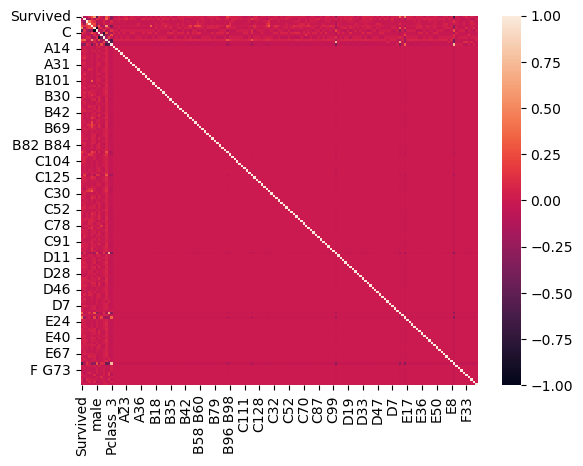

In [59]:
sb.heatmap(td.corr())

# Overall Observation